In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


# About Dataset

**Context**

**Problem Statement**

1. How effective is the test preparation course?
2. Which major factors contribute to test outcomes?
3. What would be the best way to improve student scores on each test?

**Content**

**Attributes**

**People**

* Gender : Student's gender
* Race : Student's Race/Ethnicity

**Factors**

* ParentEdu : Student's Parents level of education
* Lunch : Types of lunch students get
* TestPrep : If student finsished test preparation course

**Resutls**

* Math : Student's Math score
* Reading : Student's Reading score
* Writing : Student's Writing score

**Labeling**

* Gender : 0:Female, 1:Male
* Race : 0:Group A, 1:Group B, 2:Group C, 3:Group D, 4:Group E
* ParentEdu : 0:Bachelor's Degree, 1:College, 2:High School, 3:Master's Degree
* Lunch : 0:Free, 1:Standard
* TestPrep : 0:Completed, 1:None

**Target**


Need to perform clustering to summarize student segments.

In [2]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading and making a copy of the dataset

main_df = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")
df = main_df.copy()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
df.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

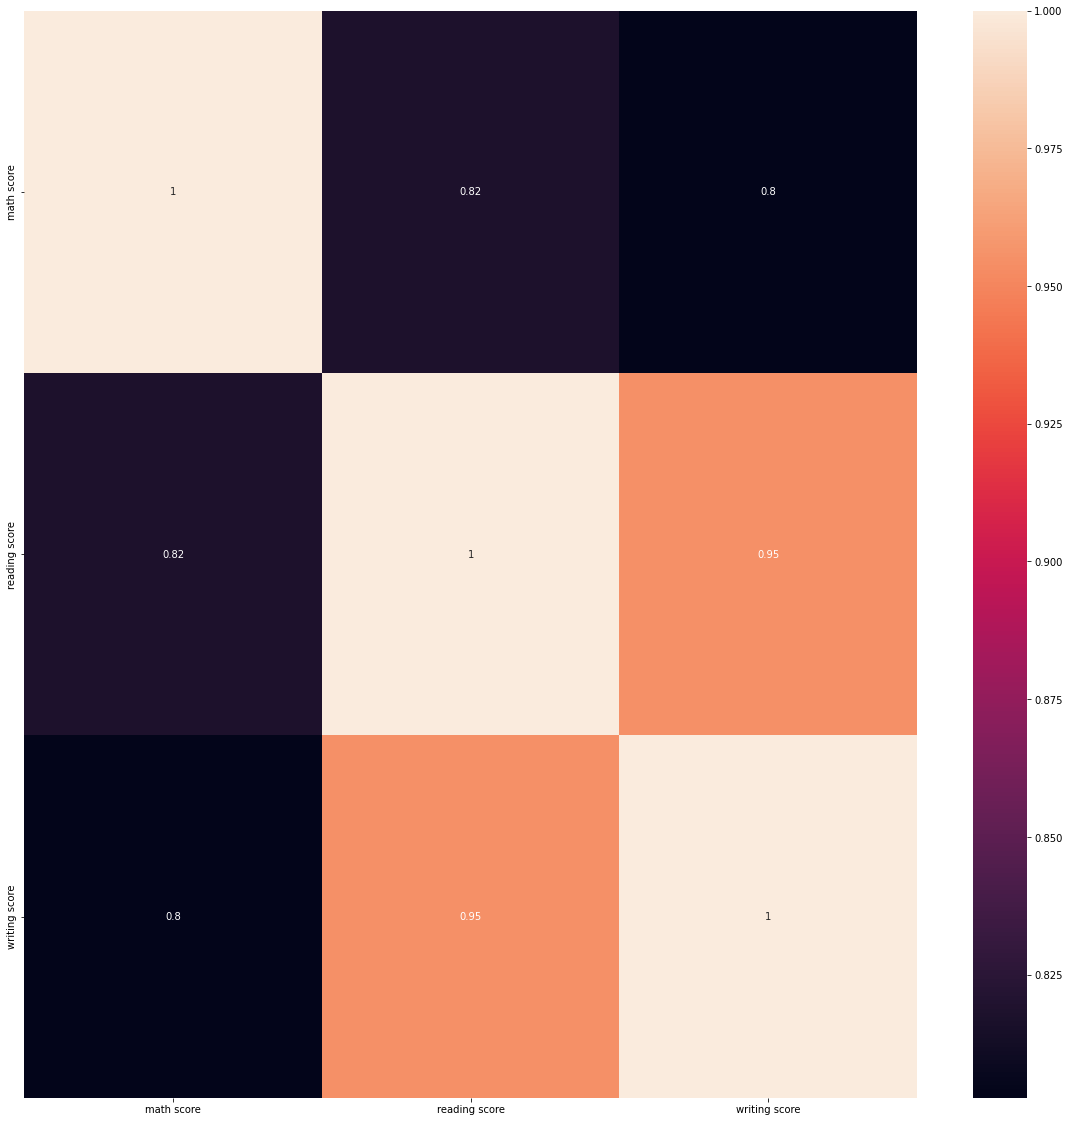

In [8]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
# Checking for correlation by unstacking data

corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

math score     math score       1.000000
reading score  reading score    1.000000
writing score  writing score    1.000000
reading score  writing score    0.954598
writing score  reading score    0.954598
math score     reading score    0.817580
reading score  math score       0.817580
math score     writing score    0.802642
writing score  math score       0.802642
dtype: float64

# Preprocessing of the dataset

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.columns = ['Gender', 'Race', 'ParentEdu', 'Lunch', 'TestPrep', 'Math', 'Reading', 'Writing']

In [12]:
df.head()

,Gender,Race,ParentEdu,Lunch,TestPrep,Math,Reading,Writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

In [14]:
df['Race'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race, dtype: int64

In [15]:
df['ParentEdu'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: ParentEdu, dtype: int64

In [16]:
df['ParentEdu'] = df['ParentEdu'].replace(["some college", "associate's degree"], "college")
df['ParentEdu'] = df['ParentEdu'].replace(["high school", "some high school"], "high school")

In [17]:
df['ParentEdu'].value_counts()

college              448
high school          375
bachelor's degree    118
master's degree       59
Name: ParentEdu, dtype: int64

In [18]:
df['Lunch'].value_counts()

standard        645
free/reduced    355
Name: Lunch, dtype: int64

In [19]:
df['TestPrep'].value_counts()

none         642
completed    358
Name: TestPrep, dtype: int64

In [20]:
df.head()

,Gender,Race,ParentEdu,Lunch,TestPrep,Math,Reading,Writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,college,free/reduced,none,47,57,44
4,male,group C,college,standard,none,76,78,75


# Visualization

**Gender and Race**

In [21]:
fig = px.box(df, x='Race', y ='Math', color = 'Gender')
fig.show()

In [22]:
fig = px.box(df, x='Race', y ='Reading', color = 'Gender')
fig.show()

In [23]:
fig = px.box(df, x='Race', y ='Writing', color = 'Gender')
fig.show()

* Male better in Math
* Female better in Reading and Writing
* Group E have the highest median in all subject

**Lunch and ParentEducation**

In [24]:
fig = px.box(df, x='ParentEdu', y ='Math', color = 'Lunch')
fig.show()

In [25]:
fig = px.box(df, x='ParentEdu', y ='Reading', color = 'Lunch')
fig.show()

In [26]:
fig = px.box(df, x='ParentEdu', y ='Writing', color = 'Lunch')
fig.show()

* Higher their parents education mean higher student's score
* nutrition that goes to students affects student score

**Test Preparation**

In [27]:
fig = px.box(df, x='TestPrep', y ='Math')
fig.show()

In [28]:
fig = px.box(df, x='TestPrep', y ='Reading')
fig.show()

In [29]:
fig = px.box(df, x='TestPrep', y ='Writing')
fig.show()

* Students that finished their test preparation course have higher score

# labeling

In [30]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Gender', 'Race', 'ParentEdu', 'Lunch', 'TestPrep']


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**Label Encoding**

In [32]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [33]:
df1 = df.copy()

In [34]:
df1.head()

,Gender,Race,ParentEdu,Lunch,TestPrep,Math,Reading,Writing
0,0,1,0,1,1,72,72,74
1,0,2,1,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,1,0,1,47,57,44
4,1,2,1,1,1,76,78,75


**Standardization**

In [35]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [36]:
scaled_features_df.head()

,Gender,Race,ParentEdu,Lunch,TestPrep,Math,Reading,Writing
0,-0.964625,-1.015044,-1.792568,0.741881,0.746748,0.390024,0.193999,0.391492
1,-0.964625,-0.150441,-0.488882,0.741881,-1.339140,0.192076,1.427476,1.313269
2,-0.964625,-1.015044,2.118489,0.741881,0.746748,1.577711,1.770109,1.642475
3,1.036672,-1.879647,-0.488882,-1.347925,0.746748,-1.259543,-0.833899,-1.583744
4,1.036672,-0.150441,-0.488882,0.741881,0.746748,0.653954,0.605158,0.457333


**Elbow Method**

In [37]:
from sklearn.cluster import KMeans

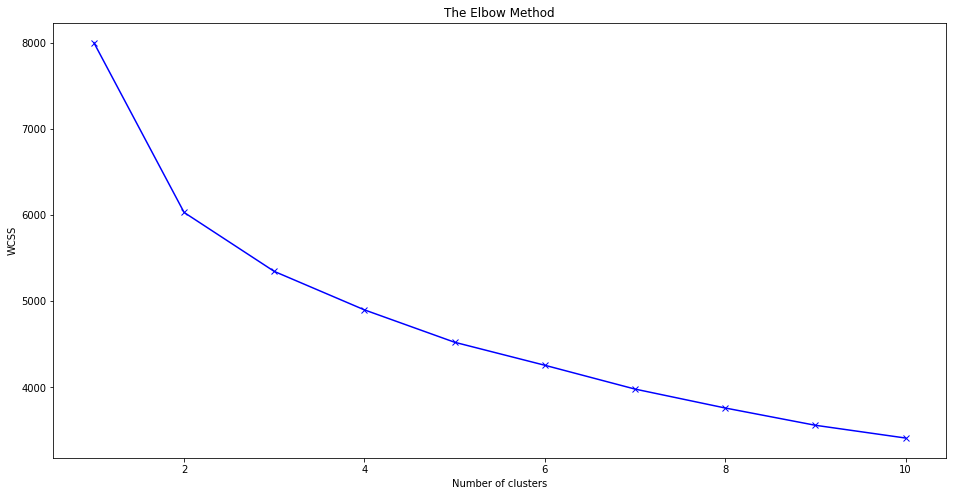

In [38]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Silhouette Score**

In [39]:
from sklearn.metrics import silhouette_score

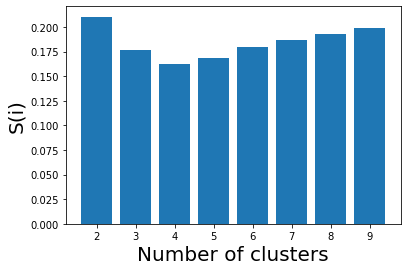

In [40]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [41]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


**Model Building**

In [42]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

df['cluster'] = pred + 1

In [43]:
df.head()

,Gender,Race,ParentEdu,Lunch,TestPrep,Math,Reading,Writing,cluster
0,0,1,0,1,1,72,72,74,1
1,0,2,1,1,0,69,90,88,1
2,0,1,3,1,1,90,95,93,1
3,1,0,1,0,1,47,57,44,2
4,1,2,1,1,1,76,78,75,1


In [44]:
df['ParentEdu'].value_counts()

1    448
2    375
0    118
3     59
Name: ParentEdu, dtype: int64

In [45]:
df['Race'].value_counts()

2    319
3    262
1    190
4    140
0     89
Name: Race, dtype: int64

In [46]:
df['Lunch'].value_counts()

1    645
0    355
Name: Lunch, dtype: int64

# Clustering

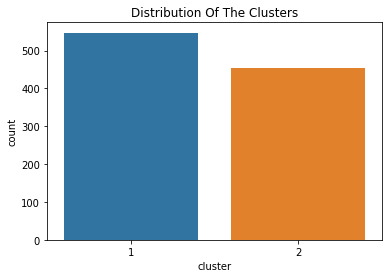

In [47]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

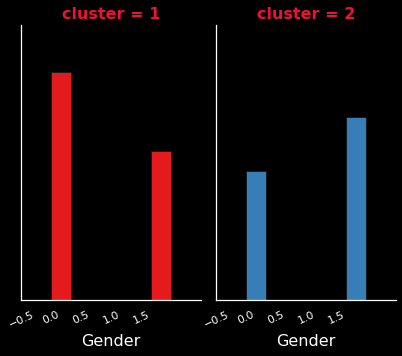

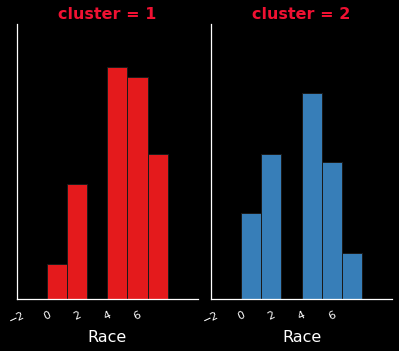

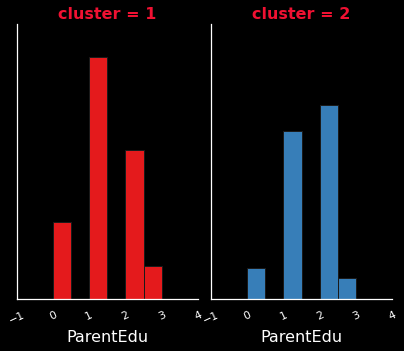

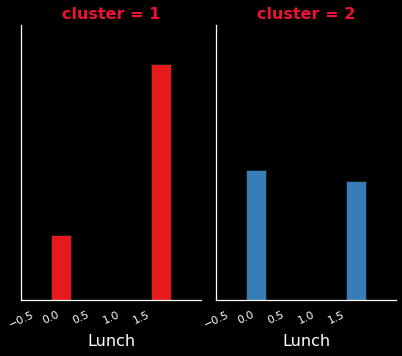

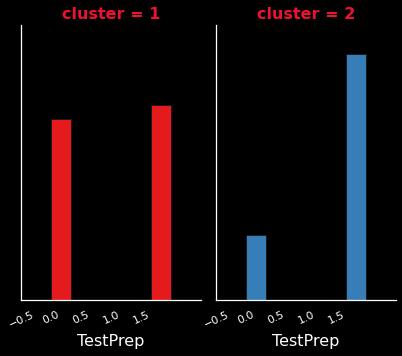

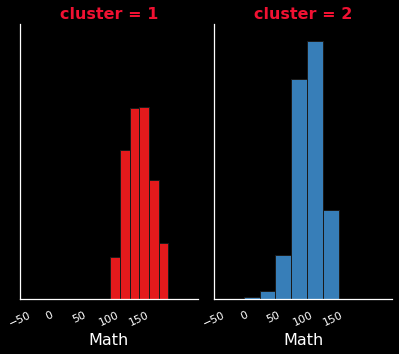

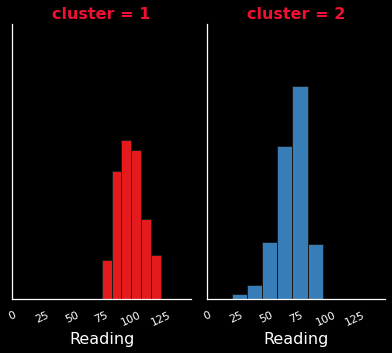

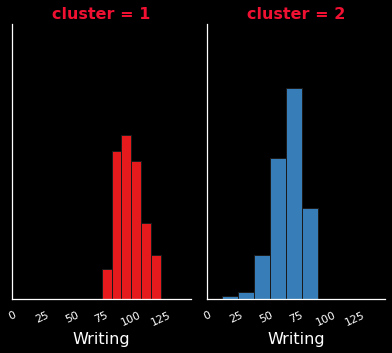

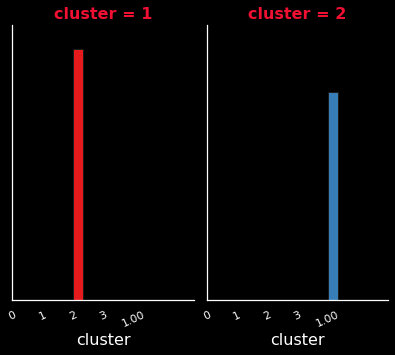

In [48]:
# Clusters interpretation 
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df:
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

# Report

**Based on above information we can divide Students into 2 parts:-**

    1. Higher Score Student : These Students belong to cluster one
    2. Lower Score Student : These Students belong to cluster two

**Characteristics of Higher Score Student**

    * In terms of Gender
      ■ Female dominated Higher Score Student
    * In terms of Race
      ■ Race of Higher Score Student are mostly from Group C,D,E
    * In terms of Parent Education
      ■ Parent education of Higher Score Student are more educated
    * In terms of Lunch
      ■ Higher Score Student have more lunch 
    * In terms of Test Preparation
      ■ There is not much different between completing test preparation course and not completing
      ■ Completing test preparation course increase possibility to have higher score
    * In terms of Math Score
      ■ have more score than lower score student
    * In terms of Reading Score
      ■ have more score than lower score student
    * In terms of Writing Score
      ■ have more score than lower score student

**Characteristics of Lower Score Student**

    * In terms of Gender
      ■ Male dominated Lower Score Student
    * In terms of Race
      ■ Race of Lower Score Student are mostly from Group A,B
    * In terms of Parent Education
      ■ Parent education of Lower Score Student are mostly from high school background
    * In terms of Lunch
      ■ Lower Score Student have less lunch 
    * In terms of Test Preparation
      ■ Lower Score Student are mostly not finishing test preparation course 
    * In terms of Math Score
      ■ have less score than High score student
    * In terms of Reading Score
      ■ have less score than High score student
    * In terms of Writing Score
      ■ have less score than High score student

# The Answers to the Problem Statement

**How effective is the test preparation course?**
    
    - Not really effective because in higher score student still have a lot of student that not completing test preparation course.
    - But it is still increasing the chance to have higher score if we seen from the lower score student that students who do not completing the test preparation course almost four times students that completing the test preparation course

**Which major factors contribute to test outcomes?**
 
     - Major factors that contribute the most to the test outcomes was lunch. Almost all the students who have higher score have standard lunch

**What would be the best way to improve student scores on each test?**
 
     - Make lunch for all students the same. standard lunch all of them or no students have their lunch reduced